This is the code file for Homework2 **DDA3020 Machine Learning, Spring 2023, CUHKSZ**. There are two parts in this program problem: 
* A Warm-Up Tutorial with 4 questions
* and the formal question about wine analysis with SVM. 

Note that you only need to write down the analysis about the second part (wine analysis) in the report. You do not need to analysis anything about the warm-up part in the report, just finishing them in this ipynb file is okay.

# Warm-up: Support Vector Machines (5 Marks)

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
In this section, we will develop the intuition behind support vector machines and their use in classification problems.

We begin with the standard imports:
If you met the error like " ModuleNotFoundError: No module named 'xxxx' ", please install the libraries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Motivating Support Vector Machines

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

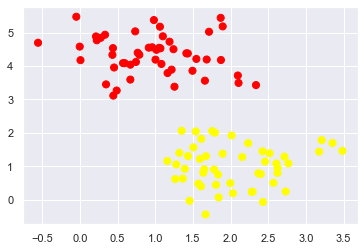

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.
But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

## Question 1: Draw three possible dividing lines to perfectly disciminate the classes.

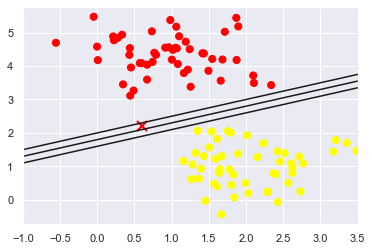

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.2], 'x', color='red', markeredgewidth=2, markersize=10)

################ Write down your answers here ####################
# For example, k=0.5, b=1.8 is a feasible solution, find another two solutions by yourself.

pairs = [(0.5, 1.8), (0.5, 2), (0.5, 1.6)]

################ Finished here ###################

 
for k, b in pairs:
    plt.plot(xfit, k * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the *Margin*

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:
## Question 2: add margin to the lines you have drawned in Question 1

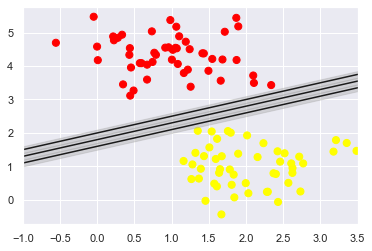

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

############ write down your answers here ################
############ pad another two pairs of parameters (k, b, d) into pairs_width ###############

pairs_width = [(0.5, 1.8, 0.1), (0.5, 2, 0.1), (0.5, 1.6, 0.1)]

############ Finish ###########


for k, b, d in pairs_width:
    yfit = k * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

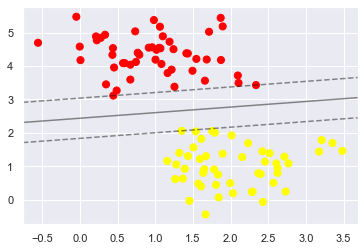

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.
These points are the pivotal elements of this fit, and are known as the *support vectors*, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [8]:
model.support_vectors_


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

## Question 3: Make three svm models with the first 60 points, the first 120 points, and the first 150 points, plot the scatters of datapoints and decision boundaries. 
Hint: you can use 'plot_svc_decision_function(model)' as the description in the above examples. You can see that, the decision boundaries of these cases are quite similar.

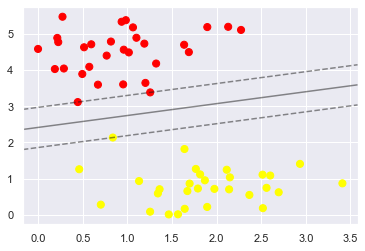

In [9]:
############ write down your answers here ##########

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

N = 60

plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=50, cmap='autumn')

model = SVC(kernel='linear', C=1E10)

model.fit(X[:N], y[:N])

plot_svc_decision_function(model)
########### Finish ###########

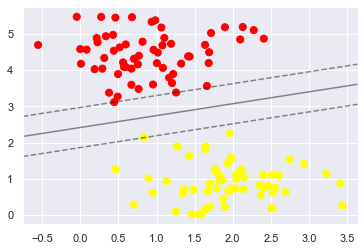

In [10]:
############ write down your answers here ##########

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

N = 120

plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=50, cmap='autumn')

model = SVC(kernel='linear', C=1E10)

model.fit(X[:N], y[:N])

plot_svc_decision_function(model)
########### Finish ###########

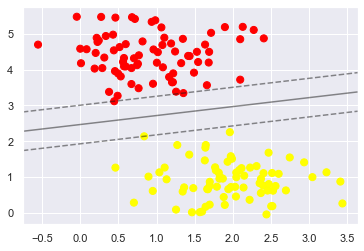

In [11]:
############ write down your answers here ##########

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

N = 150

plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=50, cmap='autumn')

model = SVC(kernel='linear', C=1E10)

model.fit(X[:N], y[:N])

plot_svc_decision_function(model)
########### Finish ###########

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with *kernels*.

There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea.
To motivate the need for kernels, let's look at some data that is not linearly separable:

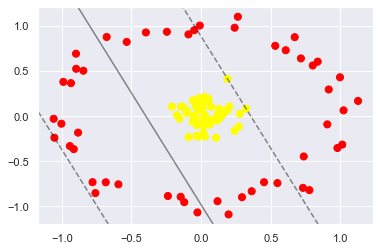

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will *ever* be able to separate this data.
But we can think about how we might project the data into a higher dimension such that a linear separator *would* be sufficient.
For example, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

In [13]:
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot—if you are running this notebook live, you will be able to use the sliders to rotate the plot:

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(0, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=30, description='azim',…

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, *r*=0.7.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results.
In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at *every* point in the dataset, and let the SVM algorithm sift through the results.
This type of basis function transformation is known as a *kernel transformation*, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally intensive as $N$ grows large.
However, because of a neat little procedure known as the [*kernel trick*](https://en.wikipedia.org/wiki/Kernel_trick), a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection!
This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the ``kernel`` model hyperparameter:

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

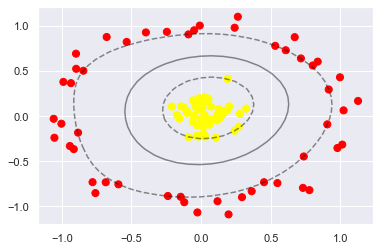

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Question 4: Have a try to replace rbf kernel with Sigmoid kernel.

Follow the process in the above cells, set C=1E3 in SVC model, plot the scatter.

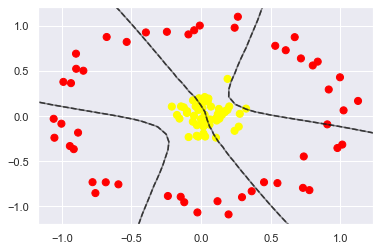

In [17]:
######### your answers here ########
model = SVC(kernel='sigmoid', C=1E3)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
######### Finish ##########

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this:

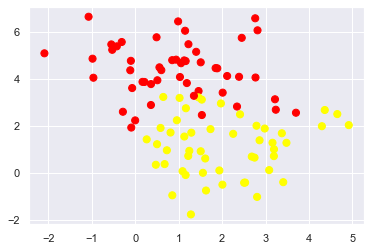

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

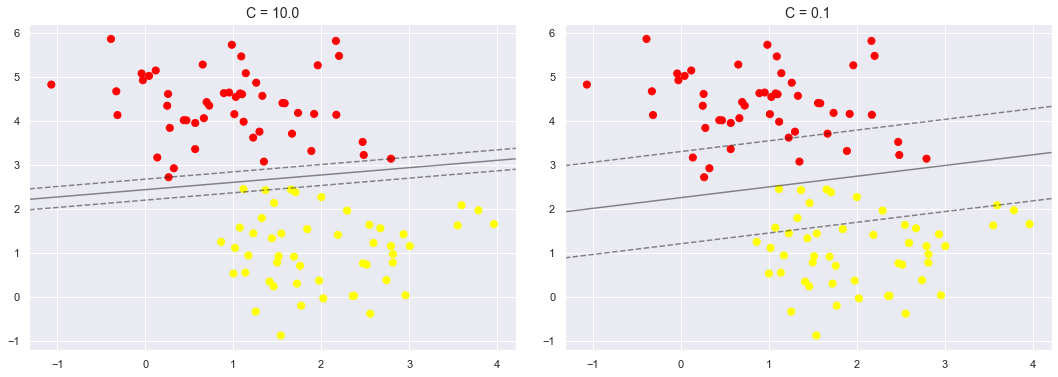

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

## Example: Wine Quality Analysis (45 scores)

As an example of support vector machines in action, let's take a look at the wine quality analysis problem.
We will use the dataset in sklearn, which consists of 178 instances and 13 attributes. 

This is a multiclassification problem so you need to you SVM with ovo or ovr.

Hint: In sklearn.svm.SVC, decision_function_shape is ‘ovr’ by default.

------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Magnesium:                    70.0 162.0    99.7  14.3
    Total Phenols:                0.98  3.88    2.29  0.63
    Flavanoids:                   0.34  5.08    2.03  1.00
    Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
    Proanthocyanins:              0.41  3.58    1.59  0.57
    Colour Intensity:              1.3  13.0     5.1   2.3
    Hue:                          0.48  1.71    0.96  0.23
    OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
    Proline:                       278  1680     746   315
    ============================= ==== ===== ======= =====

    :Missing Attribute Values: None
    :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML Wine recognition datasets.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

We have import the datasets from sklearn.datasets as follows. You can change the name of the variables 'wines' as you wish.

In [20]:
from sklearn import datasets
wines = datasets.load_wine()

list(wines.keys())


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [21]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [22]:
wines.items()

dict_items([('data', array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])), ('target', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Subproblem 1: Linear SVM 

Calculate using standard SVM model (linear separator). Fit your algorithm on the training dataset, then validate your al- gorithm on testing dataset. Compute the misclassification error of training and testing datasets, the weight vector w, the bias b, and the indices of support vectors(start with 0).

Note that the sklearn package doesn’t provide a function with strict separation so we will simulate this using C = 1e5. You should print out the coefficient for each different class separately.

For more details, refer to the homework.

In [34]:
###### write down your answers ########
###### If one cell is not enough/convenient, you can create more cells as you wish #####
linearModel = SVC(kernel='linear', C=1E5)
wholelinearModel = SVC(kernel='linear', C=1E5)
xforp1 = wines.data
yforp1 = wines.target
wholelinearModel.fit(xforp1, yforp1)
wholeErr = 1 - wholelinearModel.score(xforp1, yforp1)
print('Training Error for the whole dataset is', wholeErr)
#Split the dataset into traning set and test set.
trainSetx, testSetx, trainSety, testSety = train_test_split(xforp1, yforp1, test_size = 0.2, random_state = 0)
linearModel.fit(trainSetx, trainSety)

#Fetch the predicted label
labelTrain = linearModel.predict(trainSetx)
labelTest = linearModel.predict(testSetx)

#Things to be output
trainErr = 1 - linearModel.score(trainSetx, trainSety)
testErr = 1 - linearModel.score(testSetx, testSety)
ws = [linearModel.coef_[i] for i in range(3)]
bs = [linearModel.intercept_[i] for i in range(3)]
svIndices = [linearModel.support_[trainSety[linearModel.support_] == i] for i in range(3)]

#Outputs
print('training_error:' + str(trainErr))
print('testing_error:' + str(testErr))
for _ in range(3):
    print('w_of_wine_type_' + str(_) + ':', ws[_])
    print('b_of_wine_type_' + str(_) + ':', bs[_])
    print('support_vector_indices_of_wine_type_' + str(_) + ':', svIndices[_])

Training Error for the whole dataset is 0.0
training_error:0.0
testing_error:0.02777777777777779
w_of_wine_type_0: [ 0.63965167  0.67303317  2.0641877  -0.18931348  0.00445548 -0.33694301
  0.47339836  0.46928252 -0.20912794  0.25357763 -0.19575102  0.30897943
  0.00505666]
b_of_wine_type_0: -17.25747015603461
support_vector_indices_of_wine_type_0: [  4  36  99 124]
w_of_wine_type_1: [ 0.04419171  0.10853448  0.07231087 -0.07818079  0.01099053  0.29594697
  0.50169748  0.00176555  0.17125891 -0.12386278  0.04927243  0.38871159
  0.00172167]
b_of_wine_type_1: -4.167164098807455
support_vector_indices_of_wine_type_1: [ 26  34  35  39  71 125]
w_of_wine_type_2: [-2.29263446e-01 -3.43621886e-01 -9.27411858e-02  1.00041193e-01
 -4.92036571e-02  2.99912226e-01  1.33760006e+00  1.48576076e-01
  6.21064338e-01 -1.09194327e+00  1.85563437e-01  5.10299052e-01
 -3.36868279e-04]
b_of_wine_type_2: 7.980927081144991
support_vector_indices_of_wine_type_2: [ 12  21  27  58  74  93 102 112]


## Subproblem 2: Linear SVM with slack variables

Calculate using SVM with slack variables. For each C = 0.1 × t, t = 1, 2, ..., 10, fit your algorithm on the training dataset, then validate your algorithm on testing dataset.

In [24]:
###### write down your answers ########
###### If one cell is not enough/convenient, you can create more cells as you wish #####
cSet = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
errS = []
slkNum = []

def calSlack(k, model):
    slackNum = 0
    #Combine the rest of the class into only one class to better calculate
    trainSetyMod = [None for _ in range(len(trainSety))]
    if k != 0:
        for i in range(len(trainSety)):
            if trainSety[i] == k:
                trainSetyMod[i] = -1
            elif trainSety[i] != k:
                trainSetyMod[i] = 1
        for j in (trainSetyMod*(trainSetx.dot(model.coef_[k].T) + model.intercept_[k])):
            if j < 1:
                slackNum += 1
    else:
        for i in range(len(trainSety)):
            if trainSety[i] == k:
                trainSetyMod[i] = 1
            elif trainSety[i] != k:
                trainSetyMod[i] = -1
        for j in (trainSetyMod*(trainSetx.dot(model.coef_[k].T) + model.intercept_[k])):
            if j < 1:
                slackNum += 1
    return slackNum

for C in cSet:
    print('When C = ', C)
    x = wines.data
    y = wines.target
    trainSetx, testSetx, trainSety, testSety = train_test_split(x, y, test_size=0.2, random_state=0)
    model = SVC(kernel = 'linear', C = C)
    model.fit(trainSetx, trainSety)
    #Things to be output
    trainErr = 1 - model.score(trainSetx, trainSety)
    testErr = 1 - model.score(testSetx, testSety)
    ws = [model.coef_[_] for _ in range(3)]
    bs = [model.intercept_[_] for _ in range(3)]
    svIndices = [model.support_[trainSety[model.support_] == _] for _ in range(3)]
    slackNumbers = [calSlack(_, model) for _ in range(3)]
    errS.append([trainErr, testErr])
    slkNum.append(slackNumbers)
    #Outputs
    print('training_error:' + str(trainErr))
    print('testing_error:' + str(testErr))
    for _ in range(3):
        print('w_of_wine_type_' + str(_) + ':', ws[_])
        print('b_of_wine_type_' + str(_) + ':', bs[_])
        print('support_vector_indices_of_wine_type_' + str(_) + ':', svIndices[_])
        print('number_of_slack_variable_of_wine_type_' + str(_) + ':', slackNumbers[_])


When C =  0.1
training_error:0.021126760563380254
testing_error:0.05555555555555558
w_of_wine_type_0: [ 0.38748038  0.44341053  0.23436545 -0.1282143  -0.00937278  0.01548467
  0.15791441  0.02538882 -0.05807086  0.30449618 -0.04619613  0.20791211
  0.00499683]
b_of_wine_type_0: -9.240553869262916
support_vector_indices_of_wine_type_0: [  4  36  61 124 134 135]
number_of_slack_variable_of_wine_type_0: 44
w_of_wine_type_1: [ 0.02207003  0.04499812  0.09061622 -0.05128053  0.00250454  0.23423743
  0.41509199 -0.00784968  0.16214646 -0.14481558  0.06271441  0.35934596
  0.00223433]
b_of_wine_type_1: -3.2857693601833566
support_vector_indices_of_wine_type_1: [ 11  26  29  31  34  35  39  65  71  90 122 125 132]
number_of_slack_variable_of_wine_type_1: 96
w_of_wine_type_2: [-0.08487368 -0.29295424 -0.10102869 -0.03953767 -0.00253179  0.07631903
  0.45465236 -0.03370608  0.12052423 -0.60369956  0.08930613  0.22714006
 -0.00146846]
b_of_wine_type_2: 5.163313700801275
support_vector_indices_of

support_vector_indices_of_wine_type_1: [ 26  34  35  39  71 125]
number_of_slack_variable_of_wine_type_1: 91
w_of_wine_type_2: [-2.27262908e-01 -3.35531130e-01 -7.45346467e-02  8.92080942e-02
 -4.69924855e-02  3.09840597e-01  1.24112449e+00  1.43924846e-01
  5.88704894e-01 -1.07904288e+00  1.87032706e-01  5.22877227e-01
 -3.18316893e-04]
b_of_wine_type_2: 7.882121496689417
support_vector_indices_of_wine_type_2: [ 12  21  27  58  74  93 102 112]
number_of_slack_variable_of_wine_type_2: 16


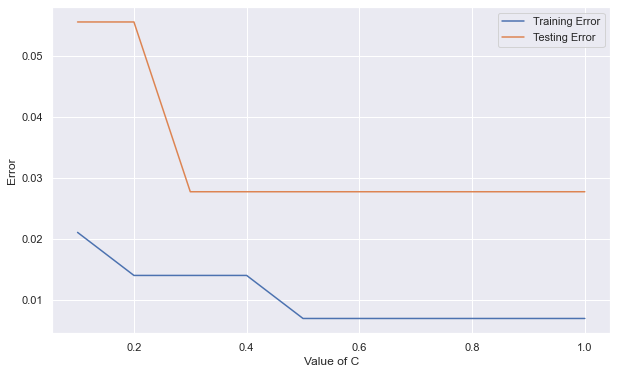

In [25]:
#Visualization
fig = plt.figure(figsize=(10, 6))
plt.plot(cSet, [errS[_][0] for _ in range(len(cSet))], label = 'Training Error')
plt.plot(cSet, [errS[_][1] for _ in range(len(cSet))], label = 'Testing Error')
plt.xlabel('Value of C')
plt.ylabel('Error')
plt.legend()

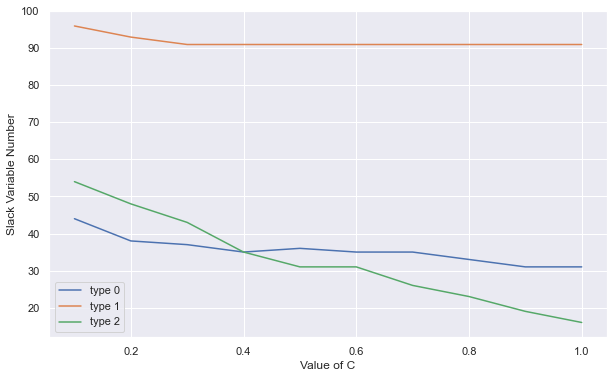

In [26]:
fig = plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(cSet, [slkNum[_][i] for _ in range(len(cSet))], label = 'type ' + str(i))
plt.xlabel('Value of C')
plt.ylabel('Slack Variable Number')
plt.legend()

## Subproblem 3: Kernel SVM
Implement SVM with kernel functions and slack variables. You should experiment with different kernel functions in this task:

(a) A 2nd-order polynomial kernel;

(b) A 3rd-order polynomial kernel;

(c) Radial Basis Function kernel with σ = 1; 

(d) Sigmoidal kernel with σ = 1;

During these tasks we set C = 1. 

In [27]:
###### write down your answers ########
###### If one cell is not enough/convenient, you can create more cells as you wish #####
C = 1
rbfKernel = 1
sigKernel = 1

xforp3 = wines.data
yforp3 = wines.target
trainSetx3, testSetx3, trainSety3, testSety3 = train_test_split(xforp3, yforp3, test_size = 0.2, random_state = 0)


In [28]:
#This block is for sub-problem (a) & (b)
for i in range(2):
    polyModel = SVC(kernel = 'poly', degree = (i + 2), C = C)
    polyModel.fit(trainSetx3, trainSety3)
    trainErr = 1 - polyModel.score(trainSetx3, trainSety3)
    testErr = 1 - polyModel.score(testSetx3, testSety3)
    bs = [polyModel.intercept_[_] for _ in range(3)]
    svIndices = [polyModel.support_[trainSety3[polyModel.support_] == _] for _ in range(3)]

    #Output
    print('This is the results when the order of the polynomial kernel = ', (i + 2))
    print('training_error:' + str(trainErr))
    print('testing_error:' + str(testErr))
    for _ in range(3):
        print('b_of_wine_type_' + str(_) + ':', bs[_])
        print('support_vector_indices_of_wine_type_' + str(_) + ':', svIndices[_])

This is the results when the order of the polynomial kernel =  2
training_error:0.34507042253521125
testing_error:0.19444444444444442
b_of_wine_type_0: -2.3685755117112466
support_vector_indices_of_wine_type_0: [  4   9  16  36  61  86 105 111 124 128 134 135 140]
b_of_wine_type_1: -2.8283346789217108
support_vector_indices_of_wine_type_1: [  1   7   8  11  22  26  28  31  33  34  35  38  39  42  44  49  53  56
  63  65  69  71  72  73  80  84  85  90  92 109 117 118 119 122 123 125
 131 132 133 137 138]
b_of_wine_type_2: 1.599520241478721
support_vector_indices_of_wine_type_2: [  0   3  10  12  14  15  17  20  21  23  24  27  30  40  41  45  46  48
  58  60  68  74  76  77  81  89  93  96  97 100 102 108 110 112 113 114
 120 121 126 127 130 141]
This is the results when the order of the polynomial kernel =  3
training_error:0.3661971830985915
testing_error:0.13888888888888884
b_of_wine_type_0: -1.9716201663995983
support_vector_indices_of_wine_type_0: [  4   9  16  36  61  86 105 124 

In [37]:
#This block is for sub-problem (c)
#Since here, gamma = \frac{sigma^2}{2}, gamma = 0.5
rbfModel = SVC(kernel = 'rbf', gamma = 1, C = C)
rbfModel.fit(trainSetx3, trainSety3)
trainErr = 1 - rbfModel.score(trainSetx3, trainSety3)
testErr = 1 - rbfModel.score(testSetx3, testSety3)
bs = [rbfModel.intercept_[_] for _ in range(3)]
svIndices = [rbfModel.support_[trainSety3[rbfModel.support_] == _] for _ in range(3)]


#Output
print('This is the results of Radial Basis Function kernel')
print('training_error:' + str(trainErr))
print('testing_error:' + str(testErr))
for _ in range(3):
    print('b_of_wine_type_' + str(_) + ':', bs[_])
    print('support_vector_indices_of_wine_type_' + str(_) + ':', svIndices[_])

This is the results of Radial Basis Function kernel
training_error:0.0
testing_error:0.5555555555555556
b_of_wine_type_0: -0.18181801729587757
support_vector_indices_of_wine_type_0: [  4   5   9  13  16  18  25  32  36  37  47  54  55  57  59  61  62  64
  67  70  75  78  79  82  83  86  87  88  91  94  98  99 101 104 105 107
 111 115 124 128 129 134 135 136 140]
b_of_wine_type_1: 0.06665976420736958
support_vector_indices_of_wine_type_1: [  1   2   6   7   8  11  19  22  26  28  29  31  33  34  35  38  39  42
  43  44  49  50  51  52  53  56  63  65  66  69  71  72  73  80  84  85
  90  92  95 103 106 109 116 117 118 119 122 123 125 131 132 133 137 138
 139]
b_of_wine_type_2: 0.236363482841961
support_vector_indices_of_wine_type_2: [  0   3  10  12  14  15  17  20  21  23  24  27  30  40  41  45  46  48
  58  60  68  74  76  77  81  89  93  96  97 100 102 108 110 112 113 114
 120 121 126 127 130 141]


In [38]:
#This block is for sub-problem (d)
sigModel = SVC(kernel = 'sigmoid', gamma = 1, C = C)
sigModel.fit(trainSetx3, trainSety3)
trainErr = 1 - sigModel.score(trainSetx3, trainSety3)
testErr = 1 - sigModel.score(testSetx3, testSety3)
bs = [sigModel.intercept_[_] for _ in range(3)]
svIndices = [sigModel.support_[trainSety3[sigModel.support_] == _] for _ in range(3)]


#Output
print('This is the results of Sigmoidal kernel')
print('training_error:' + str(trainErr))
print('testing_error:' + str(testErr))
for _ in range(3):
    print('b_of_wine_type_' + str(_) + ':', bs[_])
    print('support_vector_indices_of_wine_type_' + str(_) + ':', svIndices[_])

This is the results of Sigmoidal kernel
training_error:0.6126760563380282
testing_error:0.5555555555555556
b_of_wine_type_0: -1.0
support_vector_indices_of_wine_type_0: [  4   5   9  13  16  18  25  32  36  37  47  54  55  57  59  61  62  64
  67  70  75  78  79  82  83  86  87  88  91  94  98  99 101 104 105 107
 111 115 124 128 129 134 135 136 140]
b_of_wine_type_1: 1.0
support_vector_indices_of_wine_type_1: [ 29  31  33  34  35  38  39  42  43  44  49  50  51  52  53  56  63  65
  66  69  71  72  73  80  84  85  90  92  95 103 106 109 116 117 118 119
 122 123 125 131 132 133 137 138 139]
b_of_wine_type_2: 1.0
support_vector_indices_of_wine_type_2: [  0   3  10  12  14  15  17  20  21  23  24  27  30  40  41  45  46  48
  58  60  68  74  76  77  81  89  93  96  97 100 102 108 110 112 113 114
 120 121 126 127 130 141]


### Notice: 

You only need to write the report about wine analysis part following the instructions on the homework. Do not only paste the snapshot of the codes and plots in this ipynb file. 

Besides, you do not need to analysis the warm-up part. 

Please submit both this ipynb file and your report & written problems in a pdf file to BB.

This ipynb file is a copyright from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas. Thanks for their contributions!

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). 